<a href="https://colab.research.google.com/github/AlanHTL/Housing-Price-Prediction/blob/main/SEEM3650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Chinese University of Hong Kong

SEEM3650

Introduction to Data and Decision Analytics

Professor NGUYEN Viet Anh

5/5/2024


Huang Tsz Lun 1155174772

Lam Ho Man 1155176598

Wong Sze Hok 1155149484


# Data Description


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel('BigData.xlsx', sheet_name ='data')
data.head()

,DATE,Time-step,HPI,SnP,MACD,CPI,HSIC,H_RATE
0,1999-01-01,0,55.79,8417,-6.918074,75.5,9506.900391,6.37054
1,1999-02-01,1,55.47,7451,-6.811816,75.2,9858.490234,6.04000
2,1999-03-01,2,55.29,9507,-6.665297,74.7,10942.200195,5.67411
3,1999-04-01,3,56.18,9061,-6.403547,74.5,13333.200195,4.79241
4,1999-05-01,4,57.02,10928,-6.058490,74.4,12147.120117,5.16518


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       302 non-null    datetime64[ns]
 1   Time-step  302 non-null    int64         
 2   HPI        302 non-null    float64       
 3   SnP        302 non-null    int64         
 4   MACD       302 non-null    float64       
 5   CPI        302 non-null    float64       
 6   HSIC       302 non-null    float64       
 7   H_RATE     302 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 19.0 KB


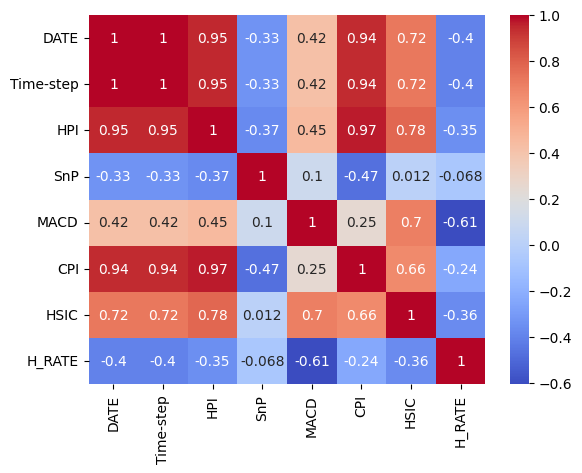

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

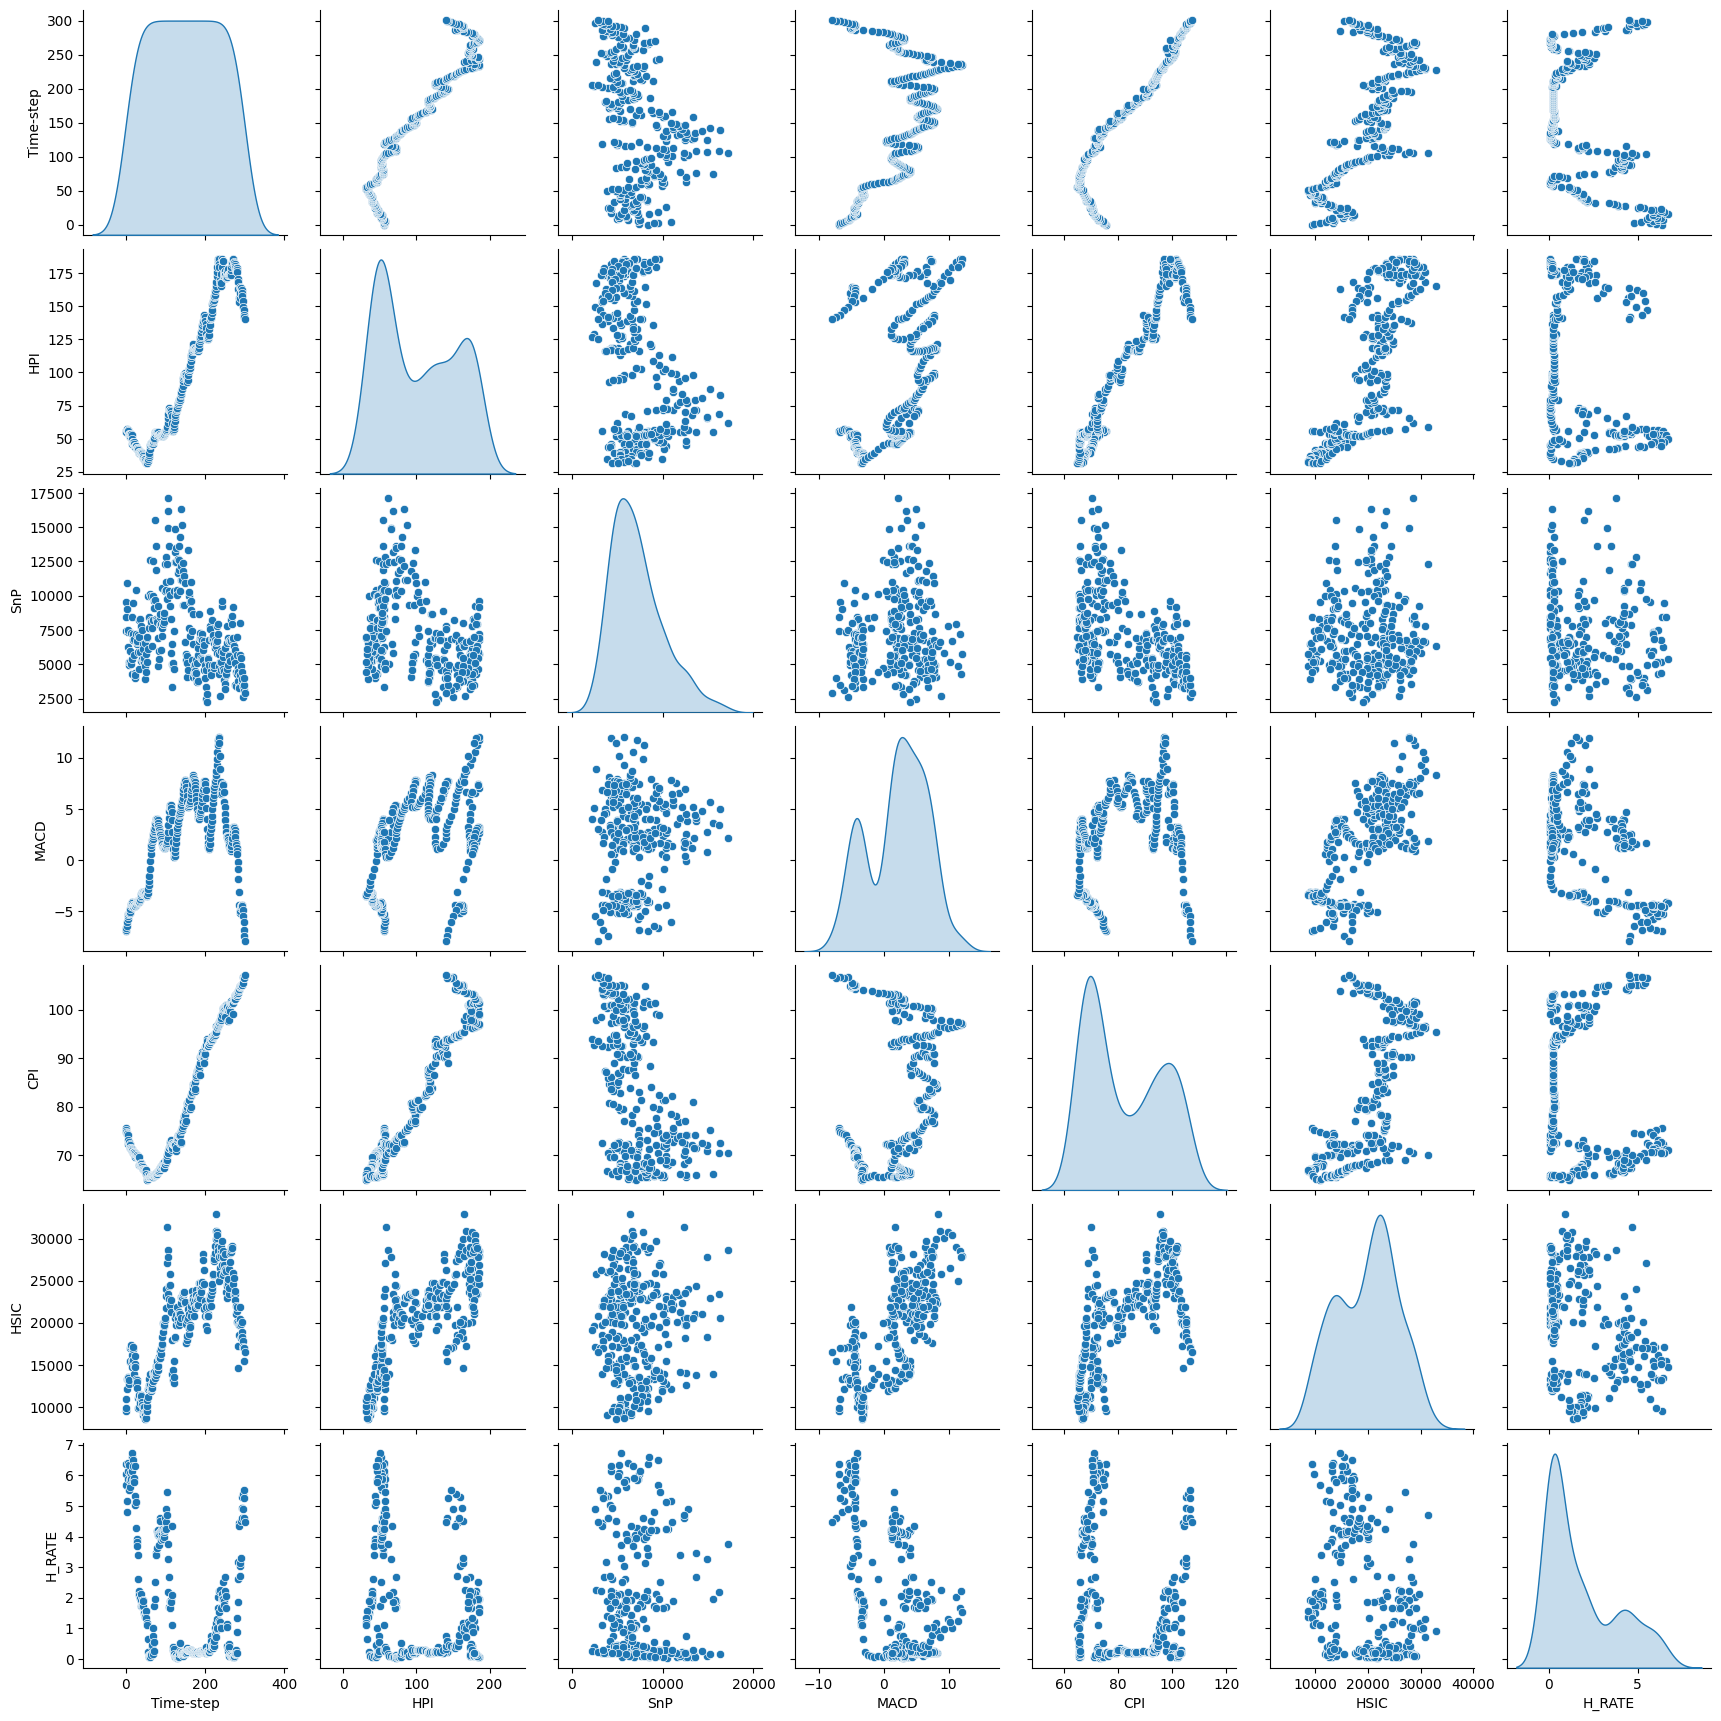

In [8]:
sns.pairplot(data=data, diag_kind='kde')
plt.show()


**Modified Data Set:**
* Lag1_HPI: The Last HPI record.

* Lag2_HPI: The 2nd last HPI record.

* **macd: (Lag1_HPI*MACD/50)+Lag2_HPI**

* SnPHPI2: HPI/Snp

* **SnpHPI2log: log(HPI/SnP)**

These additional features aim to improve the relationship between the features and the HPI. We will choose the features that can improve the MSE during training.



In [9]:
data_TimeSeries = pd.read_excel('BigData.xlsx', sheet_name ='data_TimeSeries')
data_TimeSeries.head()

,DATE,Time-step,HPI,Lag1_HPI,Lag2_HPI,macd,SnPHPI2,SnPHPI2log,SnP,MACD,CPI,HSIC,H_RATE
0,1999-01-01,0,55.79,55.33,52.19,44.534459,0.006574,-2.182197,8417,-6.918074,75.5,9506.900391,6.37054
1,1999-02-01,1,55.47,55.79,55.33,47.729376,0.007488,-2.125658,7451,-6.811816,75.2,9858.490234,6.04000
2,1999-03-01,2,55.29,55.47,55.79,48.395520,0.005835,-2.233985,9507,-6.665297,74.7,10942.200195,5.67411
3,1999-04-01,3,56.18,55.29,55.47,48.388957,0.006102,-2.214530,9061,-6.403547,74.5,13333.200195,4.79241
4,1999-05-01,4,57.02,56.18,55.29,48.482681,0.005141,-2.288959,10928,-6.058490,74.4,12147.120117,5.16518


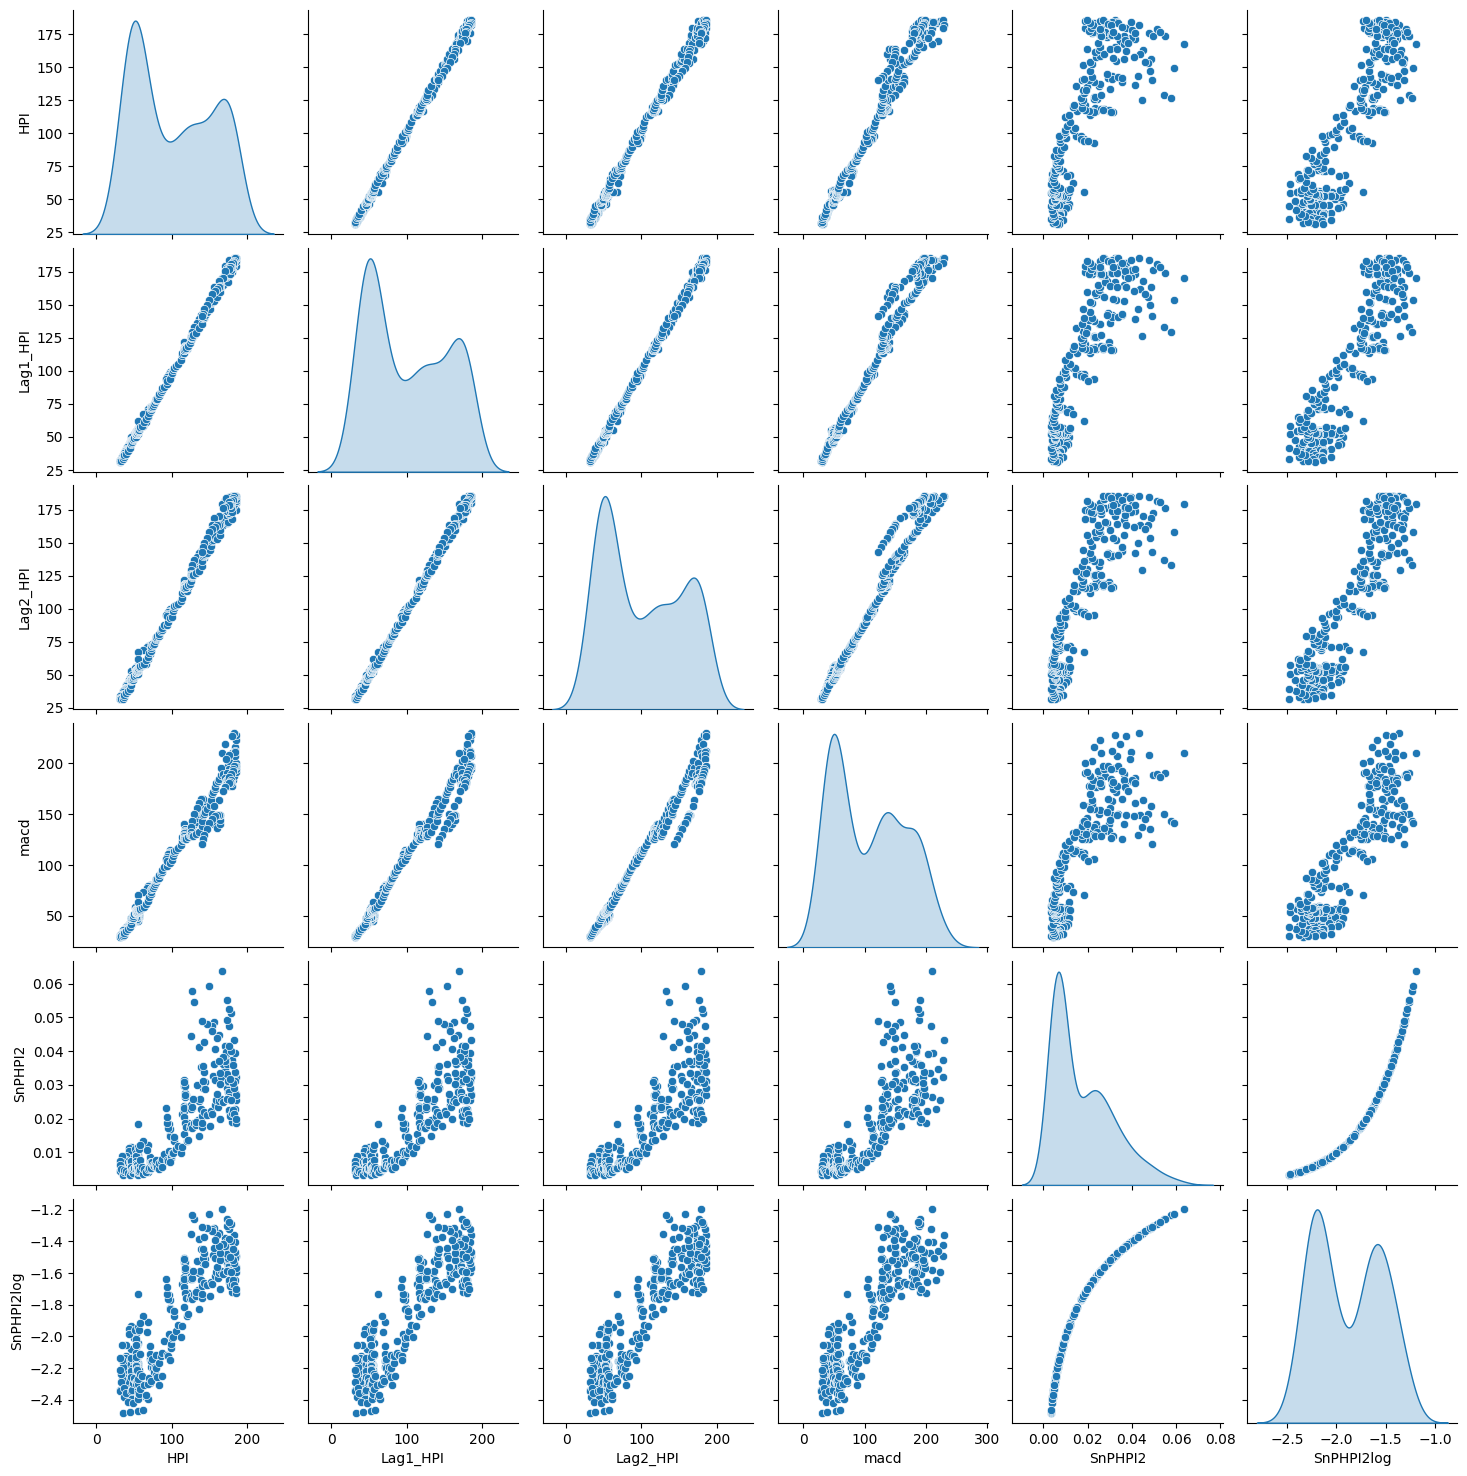

In [10]:
sns.pairplot(data=data_TimeSeries[['HPI', 'Lag1_HPI','Lag2_HPI', 'macd', 'SnPHPI2','SnPHPI2log']], diag_kind='kde')
plt.show()

# Methods and Descriptive Results


We aim to find the best model to predict the future trend of the housing price index in Hong Kong.
We also try to improve the model by modifying the data set.

**Model selection:**

* LinearRegression

* DecisionTreeRegressor

* RandomForestRegressor

* XGBRegressor

**Data Set selection**

* data[['SnP', 'MACD', 'CPI', 'HSIC', 'H_RATE']]

* data_TimeSeries[['macd', 'SnP', 'MACD', 'CPI', 'HSIC', 	'H_RATE']]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

We set N = 36 months, you could modify this to see futher

In [12]:
#init data
N = 36

dataX = np.array(data[['SnP','MACD','CPI','HSIC','H_RATE']])
datay =np.array(data['HPI'])


**Intro**

* To predict the future N months HPI, we decided to mismatch the row of the X and y. We use the N-next month's HPI to train the model.

* For example: If we set N = 36, which is 3 years, We may use the features on 1/1/1999 to predict with the features on 1/1/2002.

* Delete the Rows that have missing values after the mismatching.

In [13]:
X = dataX[:(dataX.shape[0]-N),:]
y = datay[N:]
X_train, y_train, X_test, y_test = X[:(X.shape[0]-N),:], y[:(y.shape[0]-N)], X[(X.shape[0]-N):,:], y[(y.shape[0]-N):]




*   Use LinearRegression to show how the model works to predict the future housing price index.

**Example**






In [14]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train,y_train)
# Make predictions
y_predn = model.predict(X_test)
# Evaluate the model
print(y_predn)
mse = mean_squared_error(y_test, y_predn)
print(f'Mean Squared Error: {mse}')




[192.81961372 194.58732183 196.68037053 193.17388854 196.23999264
 196.14341794 191.35010521 193.98068655 193.69299856 183.25435362
 190.52416091 191.54225296 188.14111036 191.60732816 190.8434562
 188.65668435 192.938055   190.33962048 188.69959443 189.30101863
 187.23731155 182.64612386 174.65817512 184.65430367 178.76738987
 184.2143199  183.72454037 188.98837548 180.52774945 184.9024375
 176.3070958  184.29427635 188.69552562 187.29315175 190.80754117
 193.40397609]
Mean Squared Error: 564.8389563969045


* Here We plot a graph to compare HPI prediction with the Real HPI. ⏭

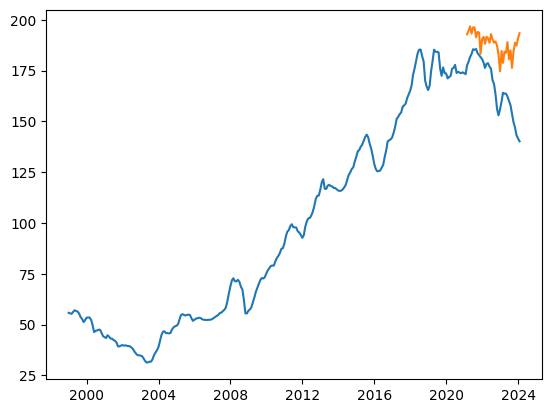

In [15]:
date = np.array(data[['DATE']])
plt.plot(date, datay)
plt.plot(date[(len(date)-len(y_predn)):], y_predn)
plt.show()

As we can see, the price prediction is not fit at all. However, We could see that the trend is quite similar.
Therefore, We can try to use the price prediction as a percentage change to further improve our prediction.

In [16]:

pc = []
for i in range(len(y_predn)):
  if i == 0:
    pc.append(datay[(len(date)-len(y_predn))])
  else:
    pc.append(pc[i-1]+(pc[i-1]*((y_predn[i]-y_predn[i-1])/y_predn[i])))


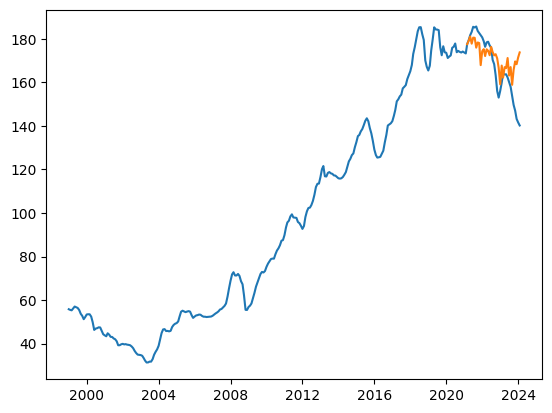

In [17]:
plt.plot(date, datay)
plt.plot(date[(len(date)-len(y_predn)):], pc)
plt.show()

We can see that the prediction here is more fit to the real HPI index.



 # Cross-validation to select models:

 Let cv = 5

* LinearRegression

* DecisionTreeRegressor

* RandomForestRegressor

* XGBRegressor


In [18]:
def cross_validation(X,y):
  #Create a list of models
  models = [
      LinearRegression(),
      DecisionTreeRegressor(),
      RandomForestRegressor(),
      xgb.XGBRegressor(),
  ]

  #Perform cross-validation for each model
  d1perform = []
  for model in models:
      scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
      mse_scores = -scores
      average_mse = mse_scores.mean()
      d1perform.append(average_mse)
      print('Model:', type(model))
      print('MSE Scores:', mse_scores)
      print('Average MSE:', average_mse)
      print()

  return d1perform


In [19]:
# We use 3 additional modified data sets to see whether the modified data set can improve the result.
dataX1 = np.array(data[['SnP','MACD','CPI','HSIC','H_RATE']])
dataX2 = np.array(data_TimeSeries[['macd','SnP',	'MACD','CPI',	'HSIC',	'H_RATE']])
dataX3 = np.array(data_TimeSeries[['SnP',	'SnPHPI2log','MACD','CPI', 'HSIC',	'H_RATE']])
dataX4 = np.array(data_TimeSeries[['macd','SnP','SnPHPI2log','MACD','CPI',	'HSIC',	'H_RATE']])

datay =np.array(data['HPI'])


In [20]:
#['SnP','MACD','CPI','HSIC','H_RATE']
X = dataX1[:(dataX1.shape[0]-N),:]
y = datay[N:]
performance_dataset1 = cross_validation(X,y)

Model: <class 'sklearn.linear_model._base.LinearRegression'>
MSE Scores: [149.69797064 258.92214921  69.11481762 370.71090803 505.12478473]
Average MSE: 270.7141260471104

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE Scores: [1623.33706852  824.71540755  724.73401698  198.91858302  253.14220943]
Average MSE: 724.9694570999302

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE Scores: [1812.44357642  725.67326073  930.21028567  237.54022057  146.97963165]
Average MSE: 770.5693950087447

Model: <class 'xgboost.sklearn.XGBRegressor'>
MSE Scores: [1980.79125784  651.15944218 1070.64583808  957.44908403  198.74972016]
Average MSE: 971.7590684579405



In [21]:
#['macd','SnP',	'MACD','CPI',	'HSIC',	'H_RATE']
X = dataX2[:(dataX2.shape[0]-N),:]
y = datay[N:]
performance_dataset2 = cross_validation(X,y)

Model: <class 'sklearn.linear_model._base.LinearRegression'>
MSE Scores: [133.80369372 187.46898526  91.0401806  268.83979345 265.05553257]
Average MSE: 189.24163711856795

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE Scores: [1660.43199444  700.34528113  672.76532075  799.2968717   297.28338113]
Average MSE: 826.0245698322854

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE Scores: [1666.74418233  388.3940698   509.37840911  217.63374627  141.81230115]
Average MSE: 584.7925417325473

Model: <class 'xgboost.sklearn.XGBRegressor'>
MSE Scores: [1666.77081536  427.26714459  790.95999173  423.54605794  175.57660321]
Average MSE: 696.8241225670436



In [22]:
#['SnP', 'SnPHPI2log','MACD', 'CPI', 'HSIC',	'H_RATE']
X = dataX3[:(dataX3.shape[0]-N),:]
y = datay[N:]
performance_dataset3 = cross_validation(X,y)

Model: <class 'sklearn.linear_model._base.LinearRegression'>
MSE Scores: [182.80360612 253.25423076  64.75788099 361.44616023 524.22703899]
Average MSE: 277.29778341905086

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE Scores: [1802.40522407  859.40572453  978.85924528  219.91122642  254.408     ]
Average MSE: 822.9978840600979

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE Scores: [1878.25768597  659.61428165  894.15536224  251.71381564  152.59047567]
Average MSE: 767.2663242333701

Model: <class 'xgboost.sklearn.XGBRegressor'>
MSE Scores: [1932.72837247  580.9623467  1083.35555761  968.34281967  215.41488963]
Average MSE: 956.1607972175573



In [23]:
#['macd','SnP', 'SnPHPI2log','MACD', 'CPI', 'HSIC',	'H_RATE']
X = dataX4[:(dataX4.shape[0]-N),:]
y = datay[N:]
performance_dataset4 = cross_validation(X,y)

Model: <class 'sklearn.linear_model._base.LinearRegression'>
MSE Scores: [147.53703895 187.74128816 115.7952312  269.82328297 272.41149187]
Average MSE: 198.66166663138915

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE Scores: [1808.43363333  787.73120566  709.69336981  715.3086      255.19855849]
Average MSE: 855.2730734591194

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE Scores: [1763.99863813  379.26601381  503.27499934  230.56694804  144.71890427]
Average MSE: 604.3651007193786

Model: <class 'xgboost.sklearn.XGBRegressor'>
MSE Scores: [1664.08419677  432.3591701   777.56780955  442.64444787  209.5377066 ]
Average MSE: 705.2386661774457



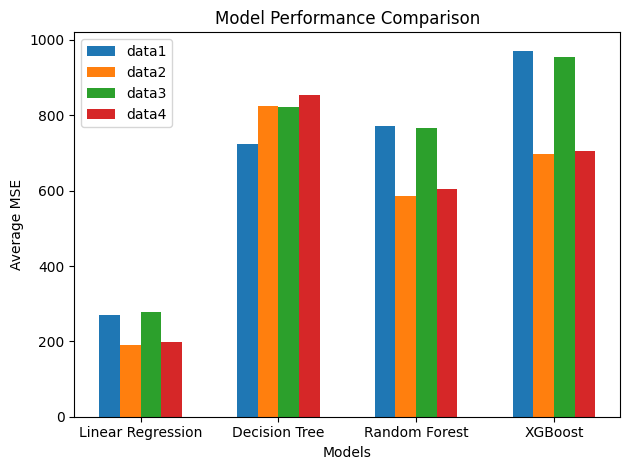

In [24]:
# Create a list of model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Set up the bar chart
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(model_names))


rects1 = ax.bar(index - bar_width, performance_dataset1, bar_width, label='data1')
rects2 = ax.bar(index, performance_dataset2, bar_width, label='data2')
rects3 = ax.bar(index + bar_width, performance_dataset3, bar_width, label='data3')
rects4 = ax.bar(index + 2 * bar_width, performance_dataset4, bar_width, label='data4')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Average MSE')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width /2)
ax.set_xticklabels(model_names)
ax.legend()

# Adjust the layout to prevent overlapping labels
fig.tight_layout()

# Show the plot
plt.show()

* we can see that the Linear Regression with data set 2 have the lowest average MSE = 182.8

Therefore, We may choose to train and use the Linear Regression model with dataset 2.

In [25]:
#data set 2
dataX = np.array(data_TimeSeries[['macd','SnP',	'MACD','CPI',	'HSIC',	'H_RATE']])
datay =np.array(data_TimeSeries['HPI'])
X = dataX[:(dataX.shape[0]-N),:]
y = datay[N:]
X_train, y_train, X_test, y_test = X[:(X.shape[0]-N),:], y[:(y.shape[0]-N)], X[(X.shape[0]-N):,:], y[(y.shape[0]-N):]

# Train the model
m1 = LinearRegression()
m2 = DecisionTreeRegressor()
m3 = RandomForestRegressor()
m4 = xgb.XGBRegressor()
m1.fit(X_train,y_train)
m2.fit(X_train,y_train)
m3.fit(X_train,y_train)
m4.fit(X_train,y_train)
# Make predictions
pred1 = m1.predict(X_test)
mse = mean_squared_error(y_test, pred1)
print(f'Mean Squared Error of m1: {mse}')

pred2 = m2.predict(X_test)
mse = mean_squared_error(y_test, pred2)
print(f'Mean Squared Error of m2: {mse}')

pred3 = m3.predict(X_test)
mse = mean_squared_error(y_test, pred3)
print(f'Mean Squared Error of m3: {mse}')

pred4 = m4.predict(X_test)
mse = mean_squared_error(y_test, pred4)
print(f'Mean Squared Error of m4: {mse}')


Mean Squared Error of m1: 283.9972613651664
Mean Squared Error of m2: 228.27828888888882
Mean Squared Error of m3: 214.07569318694308
Mean Squared Error of m4: 251.55262943328665


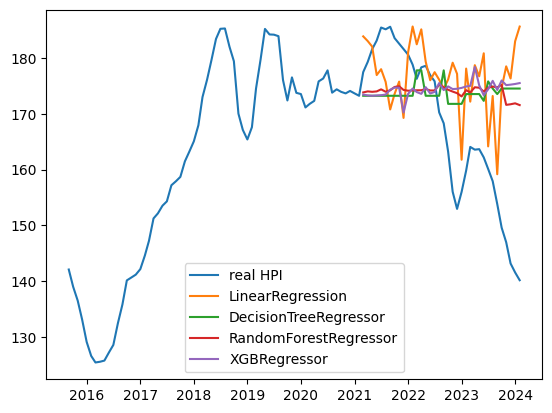

In [26]:
date = np.array(data[['DATE']])
plt.plot(date[200:], datay[200:], label = 'real HPI')
plt.plot(date[(len(date)-len(pred1)):], pred1, label = 'LinearRegression')
plt.plot(date[(len(date)-len(pred2)):], pred2, label = 'DecisionTreeRegressor')
plt.plot(date[(len(date)-len(pred3)):], pred3, label = 'RandomForestRegressor')
plt.plot(date[(len(date)-len(pred4)):], pred4, label = 'XGBRegressor')
plt.legend()
plt.show()


In [27]:
pc1 = []
for i in range(len(pred1)):
  if i == 0:
    pc1.append(datay[(len(date)-len(pred1))])
  else:
    pc1.append(pc1[i-1]+(pc1[i-1]*((pred1[i]-pred1[i-1])/pred1[i])))

pc2 = []
for i in range(len(pred2)):
  if i == 0:
    pc2.append(datay[(len(date)-len(pred2))])
  else:
    pc2.append(pc2[i-1]+(pc2[i-1]*((pred2[i]-pred2[i-1])/pred2[i])))

pc3 = []
for i in range(len(pred3)):
  if i == 0:
    pc3.append(datay[(len(date)-len(pred3))])
  else:
    pc3.append(pc3[i-1]+(pc3[i-1]*((pred3[i]-pred3[i-1])/pred3[i])))

pc4 = []
for i in range(len(pred4)):
  if i == 0:
    pc4.append(datay[(len(date)-len(pred4))])
  else:
    pc4.append(pc4[i-1]+(pc4[i-1]*((pred4[i]-pred4[i-1])/pred4[i])))

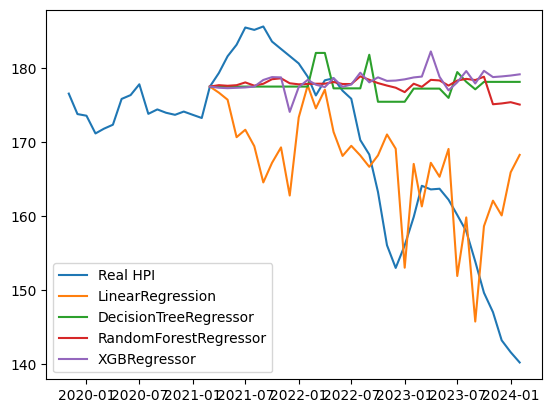

In [28]:
plt.plot(date[250:], datay[250:], label = 'Real HPI')
plt.plot(date[(len(date)-len(pred1)):], pc1,label = 'LinearRegression')
plt.plot(date[(len(date)-len(pred2)):], pc2, label = 'DecisionTreeRegressor')
plt.plot(date[(len(date)-len(pred3)):], pc3, label = 'RandomForestRegressor')
plt.plot(date[(len(date)-len(pred4)):], pc4, label = 'XGBRegressor')
plt.legend()
plt.show()

# Final Result

* LinearRegression Model with dataset 2

Prediction of the Housing Price index for the next 36 months:

In [29]:
Theta = m1.coef_
print('coefficient:',Theta)
bias = m1.intercept_
print('intercept:', bias)

coefficient: [-6.22640495e-01  6.60083188e-04  4.77940928e+00  5.23517462e+00
  9.48244508e-04 -4.88521198e+00]
intercept: -270.4126592596285


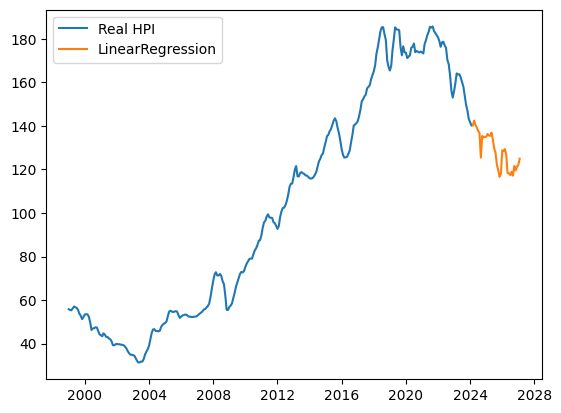

In [30]:
newdate = np.array(data['DATE']+ pd.DateOffset(months=N))
prediction = m1.predict(dataX[(len(dataX)-N):, :])
pcT = []
for i in range(len(prediction)):
  if i == 0:
    pcT.append(datay[len(date)-1])
  else:
    pcT.append(pcT[i-1]+(pcT[i-1]*((prediction[i]-prediction[i-1])/prediction[i])))
plt.plot( date,datay, label = 'Real HPI')
plt.plot( newdate[(len(date)-N):] ,pcT,label = 'LinearRegression')
plt.legend()
plt.show()